In [ ]:
install.packages("haven")
 ###Leer archivos en diferentes formatos
install.packages("ggfortify",dependencies = T) # Para ver los supuestos de normalidad
 ###Para los supuestos
install.packages("ggplot2",dependencies = T)
install.packages("lmtest")
install.packages("car")
install.packages("nortest")
install.packages("EnvStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘bitops’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘iterators’, ‘lazyeval’, ‘gtools’, ‘caTools’, ‘TTR’, ‘RSpectra’, ‘fBasics’, ‘timeDate’, ‘fastICA’, ‘cvar’, ‘fracdiff’, ‘lmtest’, ‘urca’, ‘RcppArmadillo’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘cyclocomp’, ‘rex’, ‘xmlparsedata’, ‘maps’, ‘terra’, ‘gplots’, ‘sandwich’, ‘quadprog’, ‘quantmod’, ‘plyr’, ‘rARPACK’, ‘gridExtra’, ‘changepoint’, ‘fGarch’, ‘forecast’, ‘ggrepel’, ‘glmnet’, ‘KFAS’, ‘lintr’, ‘mapdata’, ‘markdown’, ‘MSwM’, ‘raster’, ‘ROCR’, ‘sp’, ‘strucchange’, ‘timeSeries’, ‘tseries’, ‘vars’, ‘xts’, ‘zoo’, ‘lfda’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘checkmate’, ‘e1071’, ‘wk’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘mvtnorm’, ‘TH.data’, ‘Sparse

# Sección nueva

In [ ]:
library(haven)
library(ggfortify)
library(ggplot2)
library(lmtest)
library(car)
library(nortest)
library(EnvStats)

In [ ]:
datos = read_dta("espirometria.dta")
dim(datos)
head(datos)

ERROR: Error in read_dta("espirometria.dta"): could not find function "read_dta"


In [ ]:
summary(datos$edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   8.000  10.000   9.931  12.000  19.000 

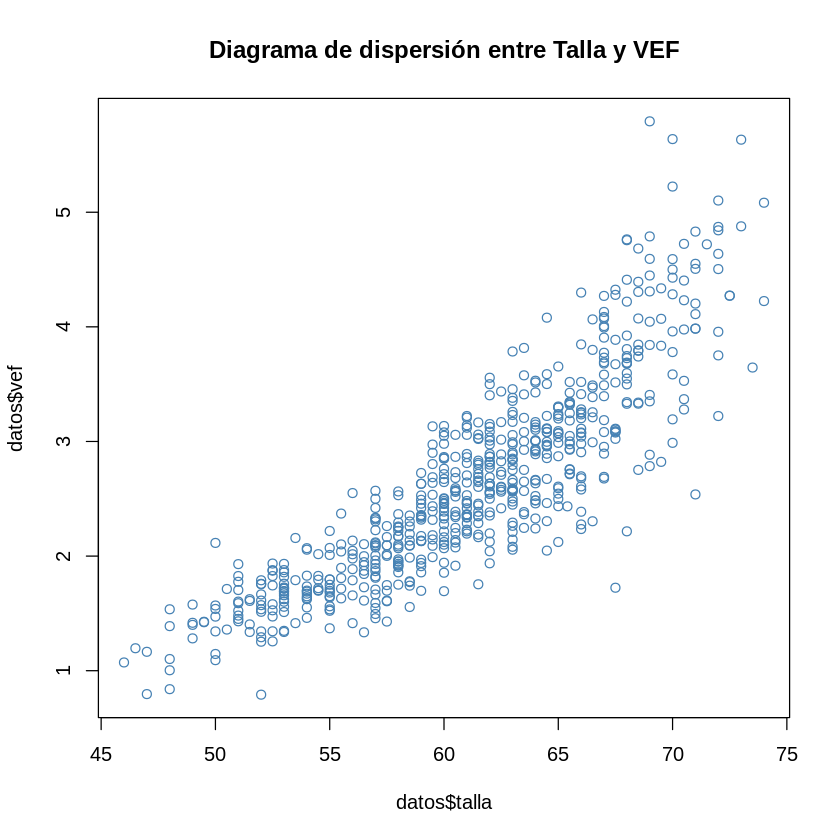

In [ ]:
#Gráfico de dispersión
#Y: VEF
#X: Talla (pulg)

plot(datos$talla , datos$vef , col="steelblue",
     main="Diagrama de dispersión entre Talla y VEF")

In [ ]:
model1 = lm (datos$vef ~ datos$talla)
summary(model1)


Call:
lm(formula = datos$vef ~ datos$talla)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75167 -0.26619 -0.00401  0.24474  2.11936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.432679   0.181460  -29.94   <2e-16 ***
datos$talla  0.131976   0.002955   44.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4307 on 652 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7533 
F-statistic:  1995 on 1 and 652 DF,  p-value: < 2.2e-16


In [ ]:
lm(vef ~ talla, data=datos)


Call:
lm(formula = vef ~ talla, data = datos)

Coefficients:
(Intercept)        talla  
     -5.433        0.132  


In [ ]:
mu=c(mean(datos$vef),mean(datos$talla))
mu

[1]  2.63678 61.14358

[1] 0.868135

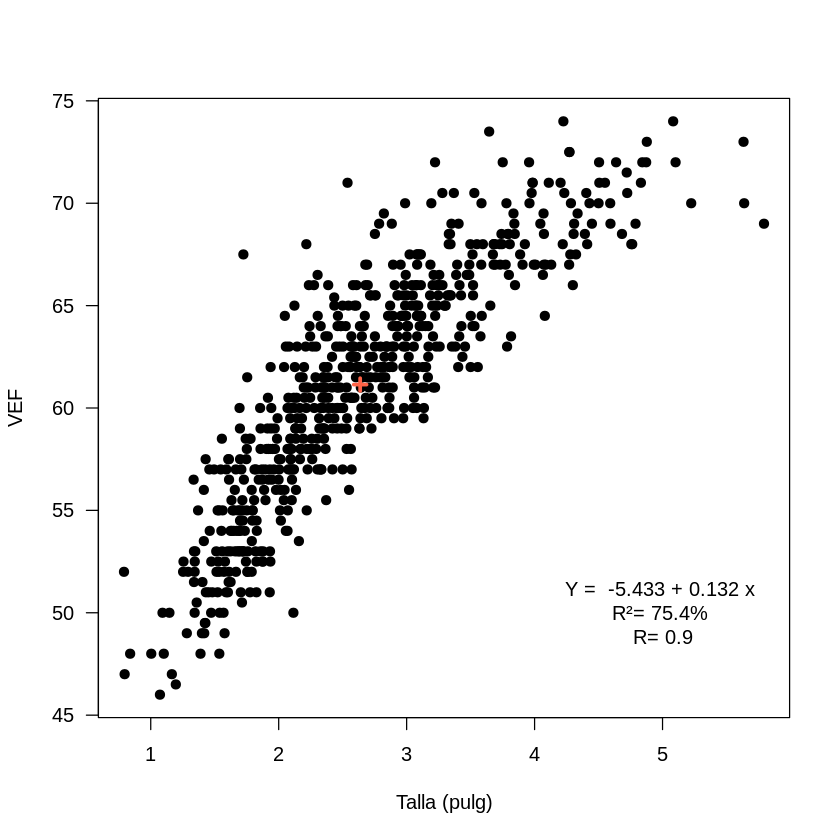

In [ ]:
#Gráfico de dispersión
plot(datos[,c("vef","talla")], xlab="Talla (pulg)", ylab="VEF", pch=19, las=1)
points(x=mu[1], y=mu[2], lwd=3, col="tomato", pch=3)

model1 = lm (datos$vef ~ datos$talla)
dat=summary(model1)
R_2=paste0(round(dat$r.squared*100,1),"%")
R=round(cor(datos$vef , datos$talla),1)
# Texto
coef <- round(coef(model1), 3)
text(5, 50,  paste("Y = ", coef[1], "+", coef[2], "x", "\nR²=",R_2, "\nR=",R))
abline(model1, col="steelblue",lwd=3)

sqrt(dat$r.squared)

In [ ]:
#Estimación por intervalos de los parametros
confint(model1)

,2.5 %,97.5 %
(Intercept),-5.7889951,-5.076363
datos$talla,0.1261732,0.137778


In [ ]:
#BONDAD DE AJUSTE DEL MODELO
summary(model1)


Call:
lm(formula = datos$vef ~ datos$talla)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75167 -0.26619 -0.00401  0.24474  2.11936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.432679   0.181460  -29.94   <2e-16 ***
datos$talla  0.131976   0.002955   44.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4307 on 652 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7533 
F-statistic:  1995 on 1 and 652 DF,  p-value: < 2.2e-16


In [ ]:
  #PREDICCION DEL VEF
head( predict( model1 , newdata =data.frame(talla= 60) ),1)
head(predict(model1,newdata =data.frame(talla= 60), interval = "confidence"),1)
head(predict(model1,newdata =data.frame(talla= 60), interval = "prediction"),1)


Warning message:
“'newdata' had 1 row but variables found have 654 rows”


1 
2.089929

Warning message:
“'newdata' had 1 row but variables found have 654 rows”


,fit,lwr,upr
1,2.089929,2.049044,2.130814


Warning message:
“'newdata' had 1 row but variables found have 654 rows”


,fit,lwr,upr
1,2.089929,1.243262,2.936595


In [ ]:
head(datos)

caso,codigo,edad,vef,talla,sexo,fumar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>
1,301,9,1.708,57.0,2,0
2,451,8,1.724,67.5,2,0
3,501,7,1.720,54.5,2,0
4,642,9,1.558,53.0,1,0
5,901,9,1.895,57.0,1,0
6,1701,8,2.336,61.0,2,0


In [ ]:
datos$vef_Estimada = model1$fitted.values
datos$residuo = datos$vef - datos$vef_Estimada
head(datos)

caso,codigo,edad,vef,talla,sexo,fumar,vef_Estimada,residuo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>
1,301,9,1.708,57.0,2,0,2.089929,-0.381928804
2,451,8,1.724,67.5,2,0,3.475672,-1.751672264
3,501,7,1.720,54.5,2,0,1.759990,-0.039989793
4,642,9,1.558,53.0,1,0,1.562026,-0.004026497
5,901,9,1.895,57.0,1,0,2.089929,-0.194928767
6,1701,8,2.336,61.0,2,0,2.617831,-0.281831066


In [ ]:
library(ggfortify)
autoplot(model1)

ERROR: Error: object 'model1' not found


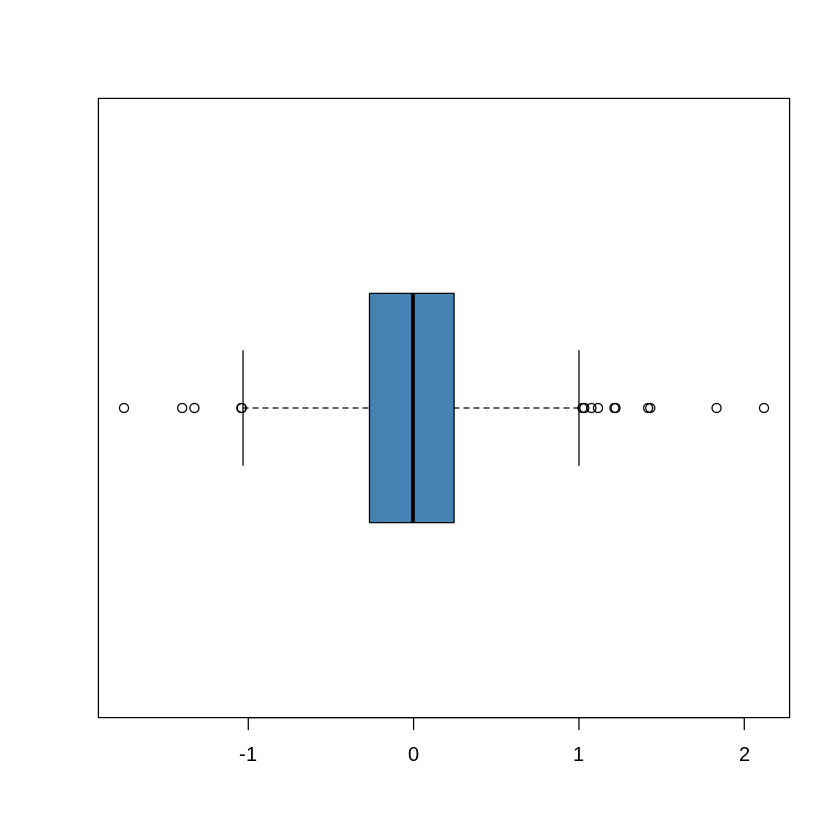

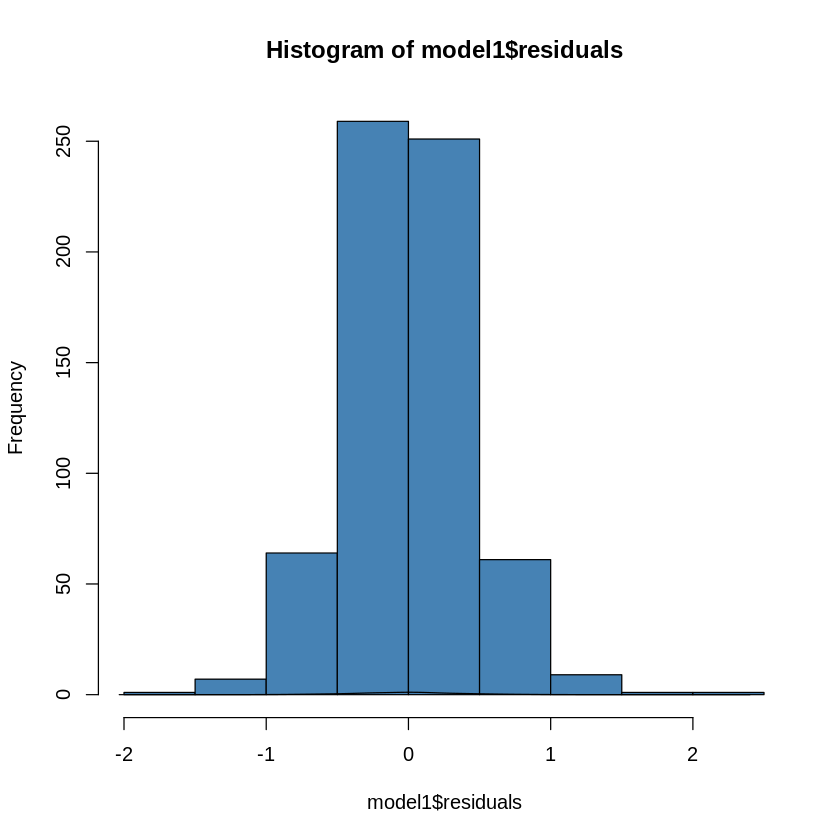

                          model1$residuals         
N                         654                      
Mean                        0.000000000000000008845
Median                     -0.004014000000000000207
10% Trimmed Mean           -0.006530000000000000214
Skew                        0.284799999999999997602
Kurtosis                    1.762999999999999900524
Min                        -1.752000000000000001776
Max                         2.119000000000000216716
Range                       3.870999999999999996447
1st Quartile               -0.266199999999999992184
3rd Quartile                0.244700000000000000844
Standard Deviation          0.43030000000000001581 
Interquartile Range         0.510900000000000020783
Median Absolute Deviation   0.376400000000000012346

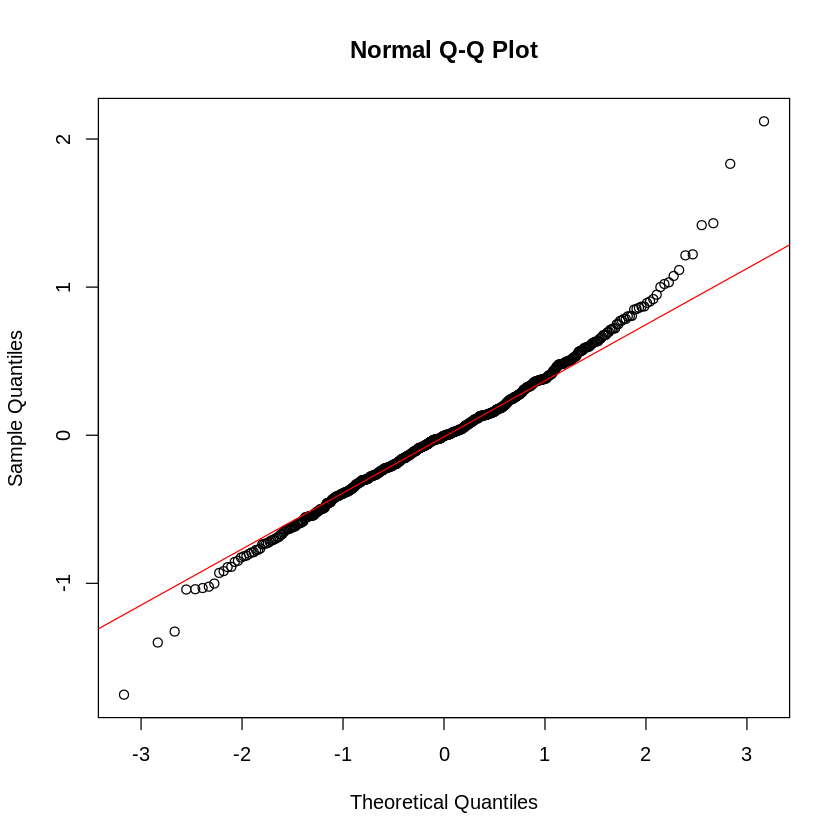

In [ ]:
options(scipen = 999)
boxplot(model1$residuals,horizontal = TRUE,col="steelblue")
hist(model1$residuals,col="steelblue")
lines(density(model1$residuals))
qqnorm(model1$residuals)
qqline(model1$residuals,col="red")
summaryFull(model1$residuals)

In [ ]:
library(nortest)
ad.test(model1$residuals)
shapiro.test(model1$residuals)
#Prueba de normalidad
#Ho: Los residuos tienen distribución normal
#Ho: Los residuos tienen no distribución normal

# Se recha Ho, en funciín de las pruebas de normalidad indican que los residuos no tienen distribución normal


	Anderson-Darling normality test

data:  model1$residuals
A = 1.6696, p-value = 0.0002754



	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.98447, p-value = 1.988e-06


In [ ]:
library(lmtest)
bptest(model1)
#Prueba de Homocedasticidad
#Ho: Homocedasticidad
#Ho: No Homocedasticidad (Heterocedasticidad)

# Se rechaza Ho, no se cumple el supuesto de Homocedasticidad


	studentized Breusch-Pagan test

data:  model1
BP = 59.734, df = 1, p-value = 0.00000000000001086


In [ ]:
library(nortest)
ad.test(model1$residuals)
shapiro.test(model1$residuals)


	Anderson-Darling normality test

data:  model1$residuals
A = 1.6696, p-value = 0.0002754



	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.98447, p-value = 0.000001988


In [ ]:
head(datos)

caso,codigo,edad,vef,talla,sexo,fumar,vef_Estimada,residuo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>
1,301,9,1.708,57.0,2,0,2.089929,-0.381928804
2,451,8,1.724,67.5,2,0,3.475672,-1.751672264
3,501,7,1.720,54.5,2,0,1.759990,-0.039989793
4,642,9,1.558,53.0,1,0,1.562026,-0.004026497
5,901,9,1.895,57.0,1,0,2.089929,-0.194928767
6,1701,8,2.336,61.0,2,0,2.617831,-0.281831066


In [ ]:
library(car)

In [ ]:
vif(model1)

datos$talla  datos$edad 
   2.682221    2.682221

In [ ]:
dim(datos)

[1] 654   7

In [ ]:
dat=data.frame(talla= 60)
dat

talla
<dbl>
60


In [ ]:
head(model1$fitted.values)

1        2        3        4        5        6 
2.089929 3.475672 1.759990 1.562026 2.089929 2.617831

In [ ]:
head(predict(model1,newdata = dat, interval = "confidence"))

Warning message:
“'newdata' had 1 row but variables found have 654 rows”


,fit,lwr,upr
1,2.089929,2.049044,2.130814
2,3.475672,3.426136,3.525209
3,1.759990,1.709201,1.810779
4,1.562026,1.504352,1.619701
5,2.089929,2.049044,2.130814
6,2.617831,2.584752,2.650910


In [ ]:
head(predict(model1,newdata =data.frame(talla= 57), interval = "confidence"),1)
head(predict(model1,newdata =data.frame(talla= 57), interval = "prediction"),1)

Warning message:
“'newdata' had 1 row but variables found have 654 rows”


,fit,lwr,upr
1,2.089929,2.049044,2.130814


Warning message:
“'newdata' had 1 row but variables found have 654 rows”


,fit,lwr,upr
1,2.089929,1.243262,2.936595
